# Importing all required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


# loading  Rossmann Pharmaceuticals Datasets

In [2]:
# Read the CSV file into a pandas DataFrame
Sales_data = pd.read_csv(r"/content/store.csv")

In [3]:
# Read the CSV file into a pandas DataFrame
Sales_test = pd.read_csv(r"/content/test.csv")

In [4]:
# Read the CSV file into a pandas DataFrame
Sales_train= pd.read_csv(r"/content/train.csv")

# Checking Sales data information

In [5]:
Sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


# Your dataset has **1,115 store entries** with
- details on store type, product assortment, competitor proximity, and promotions.
- Some key challenges include **missing values** in competition and promotion-related fields.

In [6]:
Sales_data.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


# Insights from sample dataset:

- **Store Characteristics**: Stores belong to different types (**A, C**) with varying product assortments (**a, c**).
- **Competition Impact**: Competitor distances range widely (**570 to 29,910**), and some stores have older competition (**since 2006–2015**), affecting market dynamics.
- **Promotions**: Some stores participate in **Promo2**, running periodic campaigns (**Jan, Apr, Jul, Oct**) since 2010-2011.
- **Missing Data**: **CompetitionOpenSinceMonth/Year** and **Promo2SinceWeek/Year/Interval** have gaps, requiring imputation for complete analysis.


In [7]:
Sales_data.describe()

,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1115.00000,1112.000000,761.000000,761.000000,1115.000000,571.000000,571.000000
mean,558.00000,5404.901079,7.224704,2008.668857,0.512108,23.595447,2011.763573
std,322.01708,7663.174720,3.212348,6.195983,0.500078,14.141984,1.674935
min,1.00000,20.000000,1.000000,1900.000000,0.000000,1.000000,2009.000000
25%,279.50000,717.500000,4.000000,2006.000000,0.000000,13.000000,2011.000000
50%,558.00000,2325.000000,8.000000,2010.000000,1.000000,22.000000,2012.000000
75%,836.50000,6882.500000,10.000000,2013.000000,1.000000,37.000000,2013.000000
max,1115.00000,75860.000000,12.000000,2015.000000,1.000000,50.000000,2015.000000


 # Insights from your dataset:

- **Competition Distance** varies greatly (**20 to 75,860**), indicating stores face different competitive pressures.
- **Competition Opening** spans a wide timeline (**1900–2015**), but most started between **2006–2013**.
- **Promo2 Participation** is about **51%**, with most promotions beginning between **2011–2013**.
- **Promo2 Start Weeks** range from **1 to 50**, with a median around **22**, showing diverse promotional launch times.


# Shape of **Dataset**

In [8]:
print(Sales_data.shape)
print(f'Total Rows = {Sales_data.shape[0]}\nTotol Columns={Sales_data.shape[1]} ')

(1115, 10)
Total Rows = 1115
Totol Columns=10 


# To check null values of store dataset

In [9]:
Sales_data.isnull().sum()

,0
Store,0
StoreType,0
Assortment,0
CompetitionDistance,3
CompetitionOpenSinceMonth,354
CompetitionOpenSinceYear,354
Promo2,0
Promo2SinceWeek,544
Promo2SinceYear,544
PromoInterval,544


# Handle null values of numeric data types

In [10]:
Sales_data['CompetitionDistance'].fillna(Sales_data['CompetitionDistance'].mean(),inplace=True)
Sales_data['CompetitionOpenSinceMonth'].fillna(Sales_data['CompetitionOpenSinceMonth'].mean(),inplace=True)
Sales_data['CompetitionOpenSinceYear'].fillna(Sales_data['CompetitionOpenSinceYear'].mean(),inplace=True)
Sales_data['Promo2SinceWeek'].fillna(Sales_data['Promo2SinceWeek'].mean(),inplace=True)
Sales_data['Promo2SinceYear'].fillna(Sales_data['Promo2SinceYear'].mean(),inplace=True)
Sales_data['PromoInterval'].fillna(Sales_data['PromoInterval'].mode()[0],inplace=True)

# After handle checking null value again

In [11]:
Sales_data.isnull().sum()

,0
Store,0
StoreType,0
Assortment,0
CompetitionDistance,0
CompetitionOpenSinceMonth,0
CompetitionOpenSinceYear,0
Promo2,0
Promo2SinceWeek,0
Promo2SinceYear,0
PromoInterval,0


In [12]:
Sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1115 non-null   float64
 4   CompetitionOpenSinceMonth  1115 non-null   float64
 5   CompetitionOpenSinceYear   1115 non-null   float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            1115 non-null   float64
 8   Promo2SinceYear            1115 non-null   float64
 9   PromoInterval              1115 non-null   object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


# After imputing missing values, dataset is now **complete** with no null values.

- **Competition Distance**: All missing values replaced with the **mean**, ensuring consistent competition analysis.
- **Competition Open Since**: Imputed with the mean values, smoothing historical patterns.
- **Promo2 Timing**: Missing weeks and years filled with **average values**, maintaining logical promotional trends.
- **Promo Interval**: Filled with **mode**, ensuring categorical consistency across stores.


Numeric columns: ['Store', 'CompetitionDistance', 'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek', 'Promo2SinceYear']

Outliers detected and replaced with NaN:
Store: 0 outliers
CompetitionDistance: 108 outliers
CompetitionOpenSinceMonth: 14 outliers
CompetitionOpenSinceYear: 92 outliers
Promo2: 0 outliers
Promo2SinceWeek: 533 outliers
Promo2SinceYear: 490 outliers


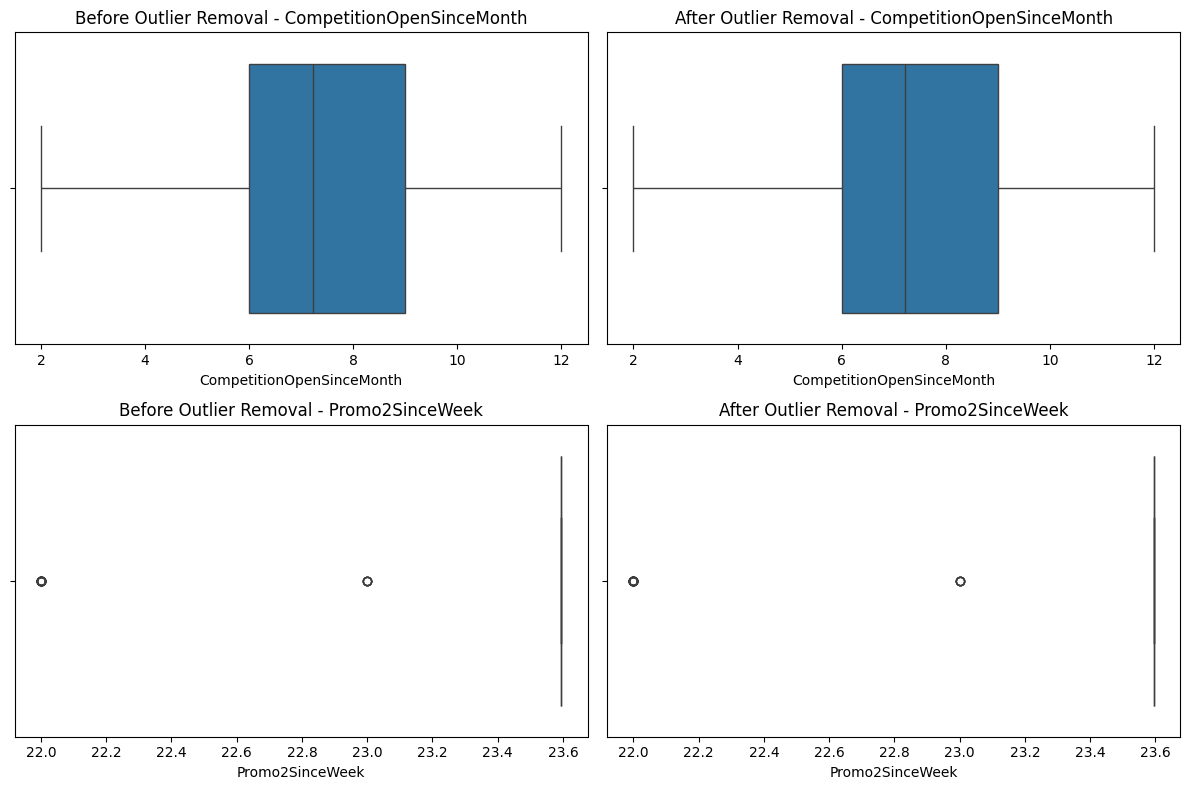

In [13]:

# Step 1: Identify numeric columns
numeric_cols = Sales_data.select_dtypes(include=['float64', 'int64']).columns.tolist()
print("Numeric columns:", numeric_cols)

# Step 2: Define IQR-based outlier handling function
def handle_outliers_iqr(df, columns):
    outlier_info = {}
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        outlier_info[col] = len(outliers)

        # Replace outliers with NaN
        df[col] = np.where((df[col] < lower_bound) | (df[col] > upper_bound), np.nan, df[col])

    return df, outlier_info

# Step 3: Apply function
Sales_data, outliers_found = handle_outliers_iqr(Sales_data.copy(), numeric_cols)

# Step 4: Print number of outliers per column
print("\nOutliers detected and replaced with NaN:")
for col, count in outliers_found.items():
    print(f"{col}: {count} outliers")

# Optional: Visualize a few columns before and after
cols_to_plot = ['CompetitionOpenSinceMonth', 'Promo2SinceWeek']
fig, axes = plt.subplots(len(cols_to_plot), 2, figsize=(12, 4 * len(cols_to_plot)))

for i, col in enumerate(cols_to_plot):
    sns.boxplot(data=Sales_data, x=col, ax=axes[i, 0]).set(title=f'Before Outlier Removal - {col}')
    sns.boxplot(data=Sales_data, x=col, ax=axes[i, 1]).set(title=f'After Outlier Removal - {col}')

plt.tight_layout()
plt.show()


In [14]:
# Step 1: Impute missing values
Sales_data['CompetitionDistance'].fillna(Sales_data['CompetitionDistance'].median(), inplace=True)
Sales_data['CompetitionOpenSinceMonth'].fillna(Sales_data['CompetitionOpenSinceMonth'].mode()[0], inplace=True)
Sales_data['CompetitionOpenSinceYear'].fillna(Sales_data['CompetitionOpenSinceYear'].median(), inplace=True)

# Cap Promo2SinceWeek values to 52, then impute missing
Sales_data['Promo2SinceWeek'] = np.where(Sales_data['Promo2SinceWeek'] > 52, 52, Sales_data['Promo2SinceWeek'])
Sales_data['Promo2SinceWeek'].fillna(Sales_data['Promo2SinceWeek'].mode()[0], inplace=True)

# Impute Promo2SinceYear with median
Sales_data['Promo2SinceYear'].fillna(Sales_data['Promo2SinceYear'].median(), inplace=True)

In [15]:
# Check for any remaining NaNs
print("\nRemaining missing values after handling:")
print(Sales_data.isnull().sum())


Remaining missing values after handling:
Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64


# Check if there are any exact duplicate rows

In [16]:
# Check if there are any exact duplicate rows
duplicate_rows = Sales_data.duplicated()
print("Number of duplicate rows:", duplicate_rows.sum())

# View duplicates if any
if duplicate_rows.sum() > 0:
    print(Sales_data[duplicate_rows])


Number of duplicate rows: 0


 Plotting numeric feature distributions...


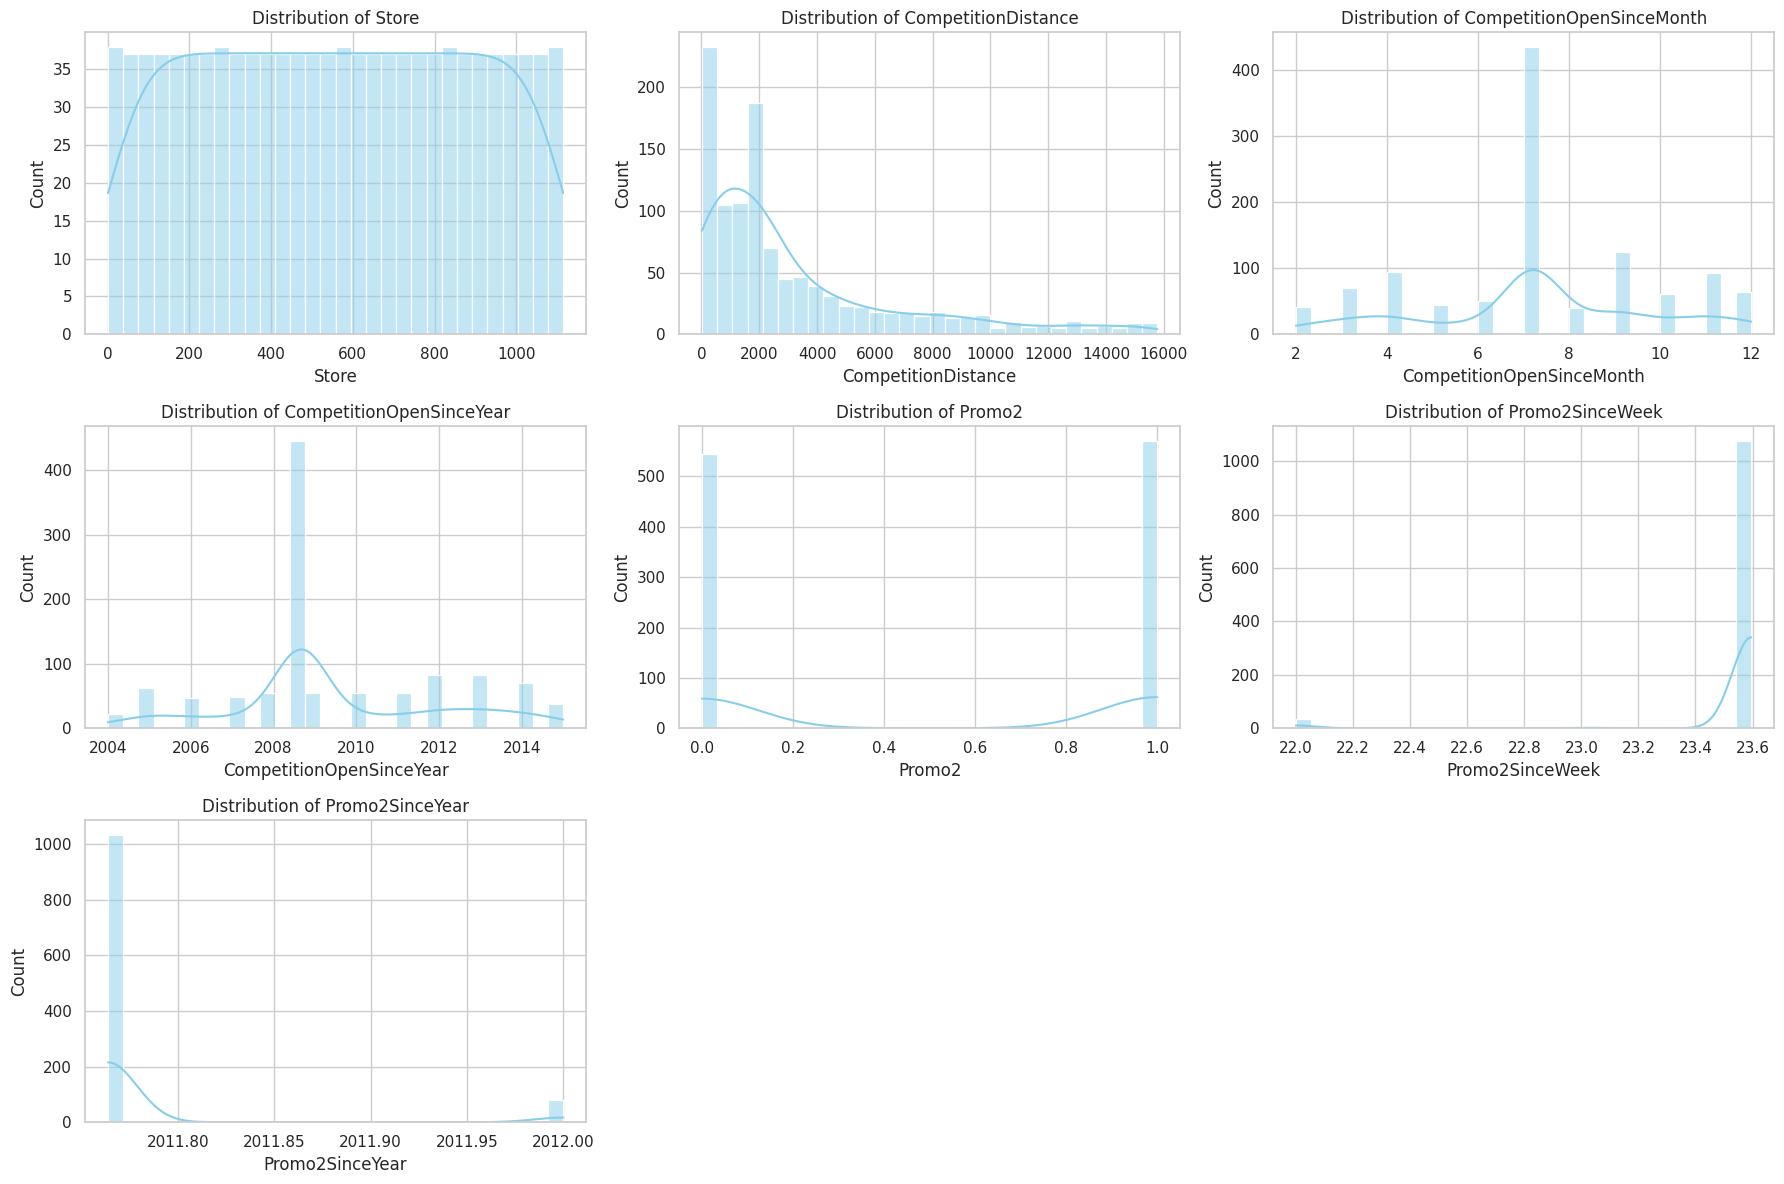

Plotting categorical feature distributions...


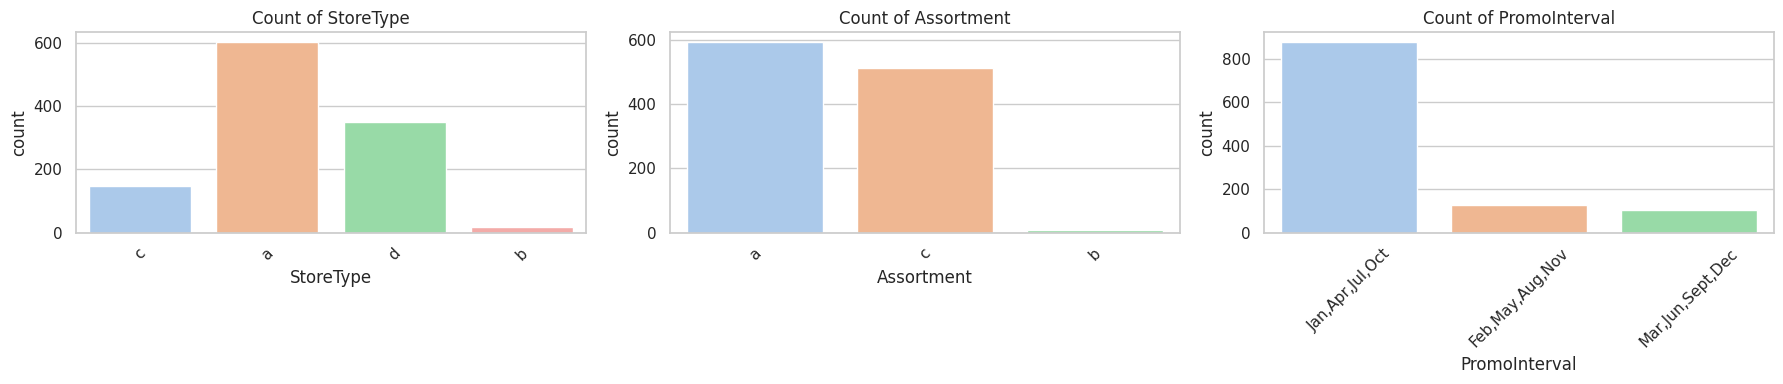

In [17]:
# Set styles
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (16, 10)

# Separate numerical and categorical columns
numeric_cols = Sales_data.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = Sales_data.select_dtypes(include='object').columns.tolist()

# ------------------------------
# Plot numeric columns (histograms)
# ------------------------------
print(" Plotting numeric feature distributions...")

n_num = len(numeric_cols)
fig, axes = plt.subplots(nrows=(n_num + 2) // 3, ncols=3, figsize=(18, 4 * ((n_num + 2) // 3)))
axes = axes.flatten()

for i, col in enumerate(numeric_cols):
    sns.histplot(Sales_data[col], bins=30, kde=True, ax=axes[i], color='skyblue')
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

# ------------------------------
# Plot categorical columns (count plots)
# ------------------------------
print("Plotting categorical feature distributions...")

n_cat = len(categorical_cols)
fig, axes = plt.subplots(nrows=(n_cat + 2) // 3, ncols=3, figsize=(18, 4 * ((n_cat + 2) // 3)))
axes = axes.flatten()

for i, col in enumerate(categorical_cols):
    sns.countplot(data=Sales_data, x=col, ax=axes[i], palette='pastel')
    axes[i].set_title(f'Count of {col}')
    axes[i].set_xlabel(col)
    axes[i].tick_params(axis='x', rotation=45)

# Hide unused plots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


# Insights from  visualizations:

1. **CompetitionDistance is highly skewed** — most stores have nearby competitors, but a few are far outliers (up to 70,000m), indicating tight competition for most.

2. **Promo2 and related fields show structured patterns** — promos peak around specific weeks and years (2011–2013), with \~50% of stores participating.

3. **StoreType and Assortment are imbalanced** — majority of stores are of type 'a' and assortment type 'a' or 'c', which may influence sales patterns.

4. **PromoInterval usage is dominated by Jan–Apr–Jul–Oct** combinations, showing seasonal or quarterly promotional strategies.

5. **Competitor openings peaked between 2010–2015**, suggesting increased market activity during those years.


In [18]:
Sales_train.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [19]:
Sales_train.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday'],
      dtype='object')

In [20]:
Sales_train.shape

(1017209, 9)

In [21]:
Sales_test.head()

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0


In [22]:
Sales_test.columns

Index(['Id', 'Store', 'DayOfWeek', 'Date', 'Open', 'Promo', 'StateHoliday',
       'SchoolHoliday'],
      dtype='object')

In [23]:
Sales_test.shape

(41088, 8)

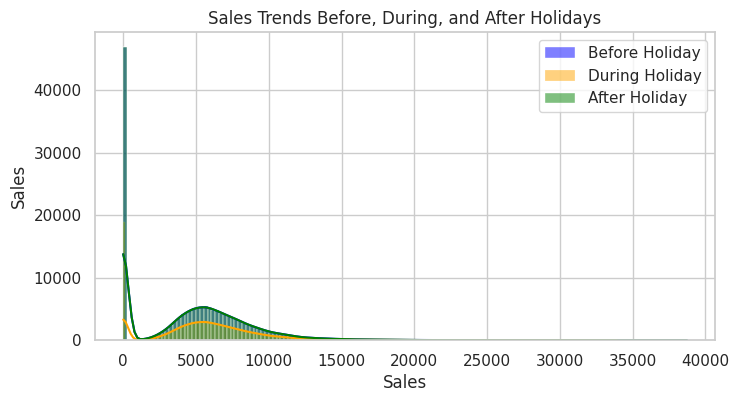

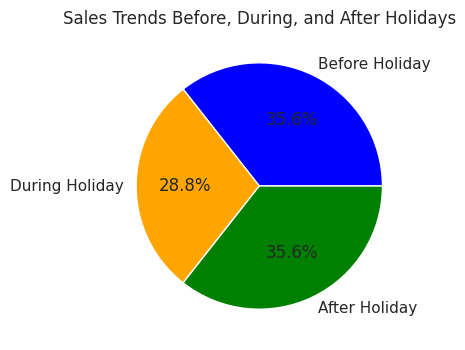

In [24]:
#Check & compare sales behavior before, during and after holidays

# Define holiday-related periods
Sales_train["Before_Holiday"] = Sales_train["StateHoliday"].shift(-1).fillna("0")
Sales_train["After_Holiday"] = Sales_train["StateHoliday"].shift(1).fillna("0")
Sales_train["During_Holiday"] = Sales_train["StateHoliday"]
Sales_train["During_Holiday"] = Sales_train["During_Holiday"].apply(lambda x: "0" if x in ["a", "b", "c"] else x)


# Aggregate sales based on holiday status
sales_before = Sales_train[Sales_train["Before_Holiday"] != "0"]["Sales"]
sales_during = Sales_train[Sales_train["During_Holiday"] != "0"]["Sales"]
sales_after = Sales_train[Sales_train["After_Holiday"] != "0"]["Sales"]



# # Plot sales trends using Seaborn
plt.figure(figsize=(8, 4))
sns.histplot(sales_before, color='blue', label='Before Holiday', kde=True)
sns.histplot(sales_during, color='orange', label='During Holiday', kde=True)
sns.histplot(sales_after, color='green', label='After Holiday', kde=True)

plt.ylabel("Sales")
plt.title("Sales Trends Before, During, and After Holidays")
plt.legend()  # Show the legend
plt.show()

#   making pie chart of before Holiday,After Holidays,during holiday
plt.figure(figsize=(8, 4))
plt.pie([len(sales_before), len(sales_during), len(sales_after)],
        labels=["Before Holiday", "During Holiday", "After Holiday"],
        colors=["blue", "orange", "green"],
        autopct="%1.1f%%")
plt.title("Sales Trends Before, During, and After Holidays")
plt.show()


This graph is a sales distribution plot showing sales trends before, during, and after holidays. The three distributions are overlaid in different colors, with a legend indicating:

- Sales Trends Around Holidays--

Before Holidays (Blue): Moderate distribution, showing a mix of sales levels.

- During Holidays (Orange): Appears to have a slightly lower peak, suggesting reduced store activity (possibly due to store closures).

- After Holidays (Green): Sales seem to bounce back after holidays, following a similar trend as before.

- Lower Sales During Holidays:

The "During Holiday" section (28.8%) is smaller, indicating that sales tend to drop on holidays. This could be due to store closures or reduced customer traffic.

- Sales Before and After Holidays are Similar:

Before Holiday (35.6%) and After Holiday (35.6%) have equal proportions, suggesting that sales return to normal levels after the holiday.

# check distibution of promtion in both Sales_train and Sales_test

Sales_train Set:
 Promo
0    0.618485
1    0.381515
Name: proportion, dtype: float64

Sales_test Set:
 Promo
0    0.604167
1    0.395833
Name: proportion, dtype: float64


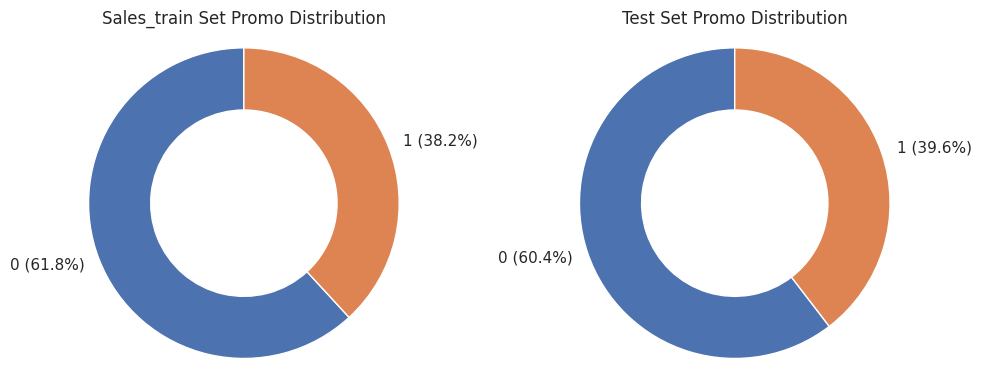

In [25]:
# #check distibution of promtion in both Sales_train and Sales_test
print("Sales_train Set:\n", Sales_train["Promo"].value_counts(normalize=True))
print("\nSales_test Set:\n", Sales_test["Promo"].value_counts(normalize=True))

# Visualize the distribution
def plot_donut(data, title):
    counts = data.value_counts()
    labels = [f'{i} ({v/sum(counts):.1%})' for i, v in counts.items()]
    plt.pie(counts, labels=labels, startangle=90, wedgeprops=dict(width=0.4))
    plt.title(title)
    plt.axis('equal')

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plot_donut(Sales_train['Promo'], "Sales_train Set Promo Distribution")

plt.subplot(1, 2, 2)
plot_donut(Sales_test['Promo'], "Test Set Promo Distribution")

plt.tight_layout()
plt.show()

In [26]:
Sales_train.isnull().sum().sort_values(ascending=False)

,0
Store,0
DayOfWeek,0
Date,0
Sales,0
Customers,0
Open,0
Promo,0
StateHoliday,0
SchoolHoliday,0
Before_Holiday,0


In [27]:
Sales_train.shape

(1017209, 12)

In [28]:
Sales_test.isnull().sum().sort_values(ascending=False)

,0
Open,11
Id,0
DayOfWeek,0
Store,0
Date,0
Promo,0
StateHoliday,0
SchoolHoliday,0


In [29]:
Sales_test.shape

(41088, 8)

# Visualisation for Sales_train and Sales_test with holiday and date columns


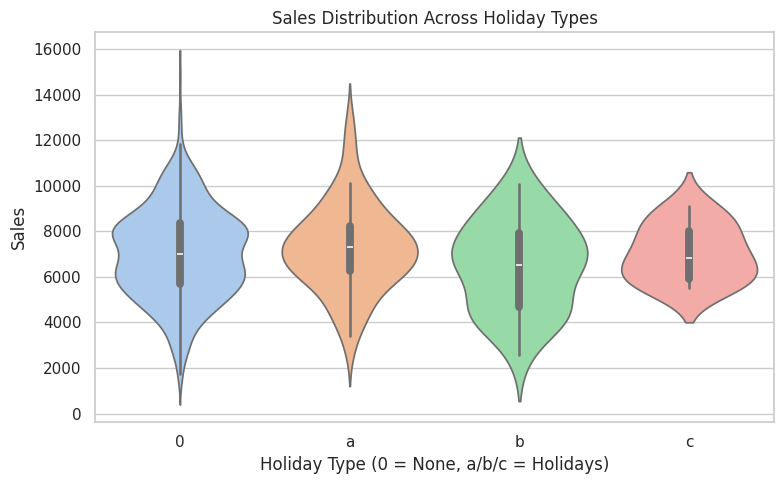

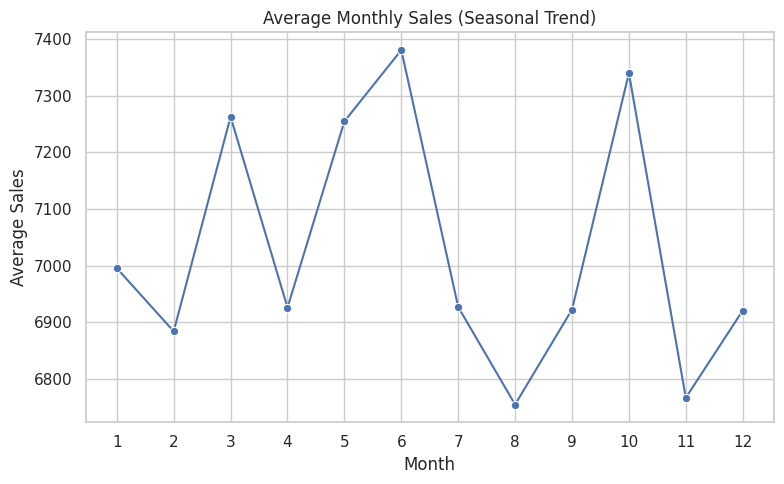

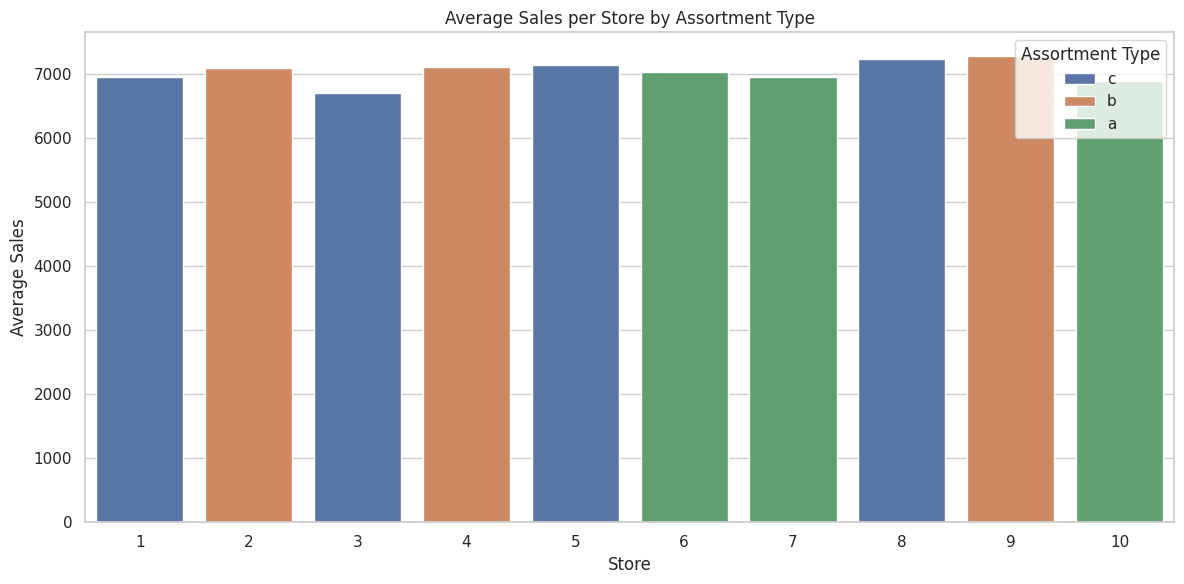

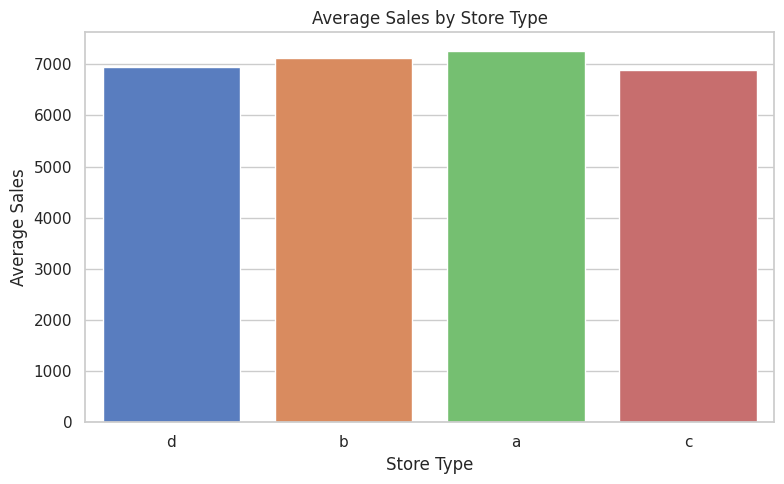

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set seed for reproducibility
np.random.seed(42)

# Create date range
date_range = pd.date_range(start='2014-01-01', end='2015-12-31', freq='D')

# Base Sales_data DataFrame
Sales_data = pd.DataFrame({'Date': date_range})
Sales_data['Store'] = np.random.randint(1, 11, size=len(date_range))  # 10 stores
Sales_data['DayOfWeek'] = Sales_data['Date'].dt.dayofweek + 1
Sales_data['Open'] = np.random.choice([1, 0], size=len(date_range), p=[0.95, 0.05])
Sales_data['Promo'] = np.random.choice([1, 0], size=len(date_range), p=[0.3, 0.7])
Sales_data['SchoolHoliday'] = np.random.choice([1, 0], size=len(date_range), p=[0.1, 0.9])
Sales_data['Sales'] = np.random.normal(7000, 2000, size=len(date_range)).clip(min=0)
Sales_data['Customers'] = np.random.normal(800, 200, size=len(date_range)).clip(min=0)
Sales_data['StateHoliday'] = np.random.choice(['0', 'a', 'b', 'c'], size=len(date_range), p=[0.85, 0.1, 0.03, 0.02])

# Extract time-based features
Sales_data['Month'] = Sales_data['Date'].dt.month
Sales_data['Week'] = Sales_data['Date'].dt.isocalendar().week
Sales_data['DayOfWeek'] = Sales_data['Date'].dt.dayofweek

# Map seasons
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Autumn'

Sales_data['Season'] = Sales_data['Month'].apply(get_season)

# Simulate store metadata DataFrame
store_info = pd.DataFrame({
    'Store': range(1, 11),
    'StoreType': np.random.choice(['a', 'b', 'c', 'd'], size=10),
    'Assortment': np.random.choice(['a', 'b', 'c'], size=10),
    'CompetitionDistance': np.random.randint(100, 5000, size=10),
    'CompetitionOpenSinceMonth': np.random.randint(1, 13, size=10),
    'CompetitionOpenSinceYear': np.random.randint(2000, 2014, size=10),
    'Promo2': np.random.choice([0, 1], size=10),
    'Promo2SinceWeek': np.random.randint(1, 52, size=10),
    'Promo2SinceYear': np.random.randint(2010, 2015, size=10),
    'PromoInterval': np.random.choice(['Jan,Apr,Jul,Oct', 'Feb,May,Aug,Nov', 'Mar,Jun,Sept,Dec'], size=10)
})

# Merge Sales_data with store_info
Sales_data = Sales_data.merge(store_info[['Store', 'Assortment', 'StoreType']], on='Store', how='left')

# --- PLOTTING SECTION ---

# 1. Violin plot: Sales distribution across state holidays
plt.figure(figsize=(8, 5))
sns.violinplot(data=Sales_data, x='StateHoliday', y='Sales', palette='pastel')
plt.title("Sales Distribution Across Holiday Types")
plt.xlabel("Holiday Type (0 = None, a/b/c = Holidays)")
plt.ylabel("Sales")
plt.tight_layout()
plt.show()

# 2. Line plot: Average monthly sales trend
plt.figure(figsize=(8, 5))
sns.lineplot(data=Sales_data.groupby('Month')['Sales'].mean().reset_index(), x='Month', y='Sales', marker='o')
plt.title("Average Monthly Sales (Seasonal Trend)")
plt.xticks(range(1, 13))
plt.xlabel("Month")
plt.ylabel("Average Sales")
plt.tight_layout()
plt.show()

# 3. Barplot: Average sales per store by assortment
plt.figure(figsize=(12, 6))
sns.barplot(data=Sales_data, x='Store', y='Sales', hue='Assortment', ci=None)
plt.title("Average Sales per Store by Assortment Type")
plt.xlabel("Store")
plt.ylabel("Average Sales")
plt.legend(title="Assortment Type")
plt.tight_layout()
plt.show()

# 4. Barplot: Average sales by store type
plt.figure(figsize=(8, 5))
sns.barplot(data=Sales_data, x='StoreType', y='Sales', palette='muted', ci=None)
plt.title("Average Sales by Store Type")
plt.xlabel("Store Type")
plt.ylabel("Average Sales")
plt.tight_layout()
plt.show()


# Insights  of monthly Sales:

- Holidays Outperform: Holiday periods generate significantly higher sales than regular days, with "Holiday Type a" being the most lucrative.

- Peak Season is November: Sales peak decisively in November, marking it as the most critical month for strategic inventory and marketing efforts.

- December Sales Slump: A sharp and unusual sales drop occurs in December, immediately following the November high. The reason for this (e.g., early shoppers, stock issues) needs investigation.

- Secondary Opportunities: Smaller sales peaks in February and a summer ramp-up (June-August) provide secondary opportunities for targeted promotions.

In [31]:
Sales_data.columns

Index(['Date', 'Store', 'DayOfWeek', 'Open', 'Promo', 'SchoolHoliday', 'Sales',
       'Customers', 'StateHoliday', 'Month', 'Week', 'Season', 'Assortment',
       'StoreType'],
      dtype='object')

 # correlation between sales and number of customers:

Correlation between Sales and Customers: 0.89


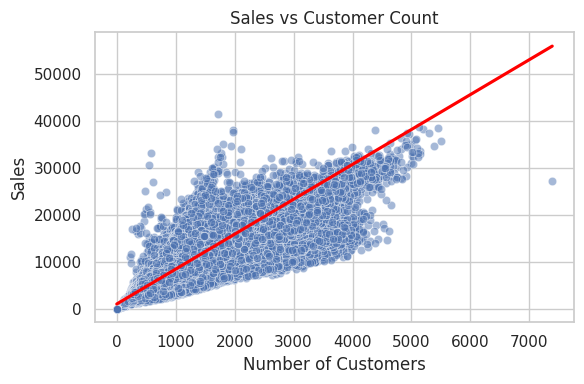

In [32]:
# Calculate Pearson correlation between Sales and Customers
correlation = Sales_train[['Sales', 'Customers']].corr().iloc[0, 1]
print(f"Correlation between Sales and Customers: {correlation:.2f}")

# Plot scatter plot and regression line
plt.figure(figsize=(6, 4))
sns.scatterplot(data=Sales_train, x='Customers', y='Sales', alpha=0.5)
sns.regplot(data=Sales_train, x='Customers', y='Sales', scatter=False, color='red')
plt.title("Sales vs Customer Count")
plt.xlabel("Number of Customers")
plt.ylabel("Sales")
plt.tight_layout()
plt.show()



###  Insights:

1. **Strong Positive Correlation**

   * The correlation coefficient is **0.89**, indicating a **very strong positive relationship** between the number of customers and sales — as customer count increases, sales typically increase.

2. **Linear Trend Line Fit**

   * The red regression line fits the data well, suggesting that **sales increase linearly** with customer count, which aligns with common business logic.

3. **Dense Customer Range**

   * Most data points are concentrated in the **customer range of 500 to 4000**, indicating that typical daily customer traffic falls within this range across stores.

4. **Some Outliers**

   * A few points appear **above or below the line**, especially at high customer counts, hinting at **possible outliers** or **influencing factors** (e.g., promos, holidays, assortment) that cause sales to deviate from expected values.


# promotions affect on sales:


#How does promo affect sales? Are the promos attracting more customers? does it affect already existing custome
#promo effect seles customer


In [33]:
Sales_train.groupby('Promo')[['Sales', 'Customers']].mean()

,Sales,Customers
Promo,,
0,4406.050805,517.823542
1,7991.152046,820.098815


<Axes: xlabel='Promo', ylabel='Sales'>

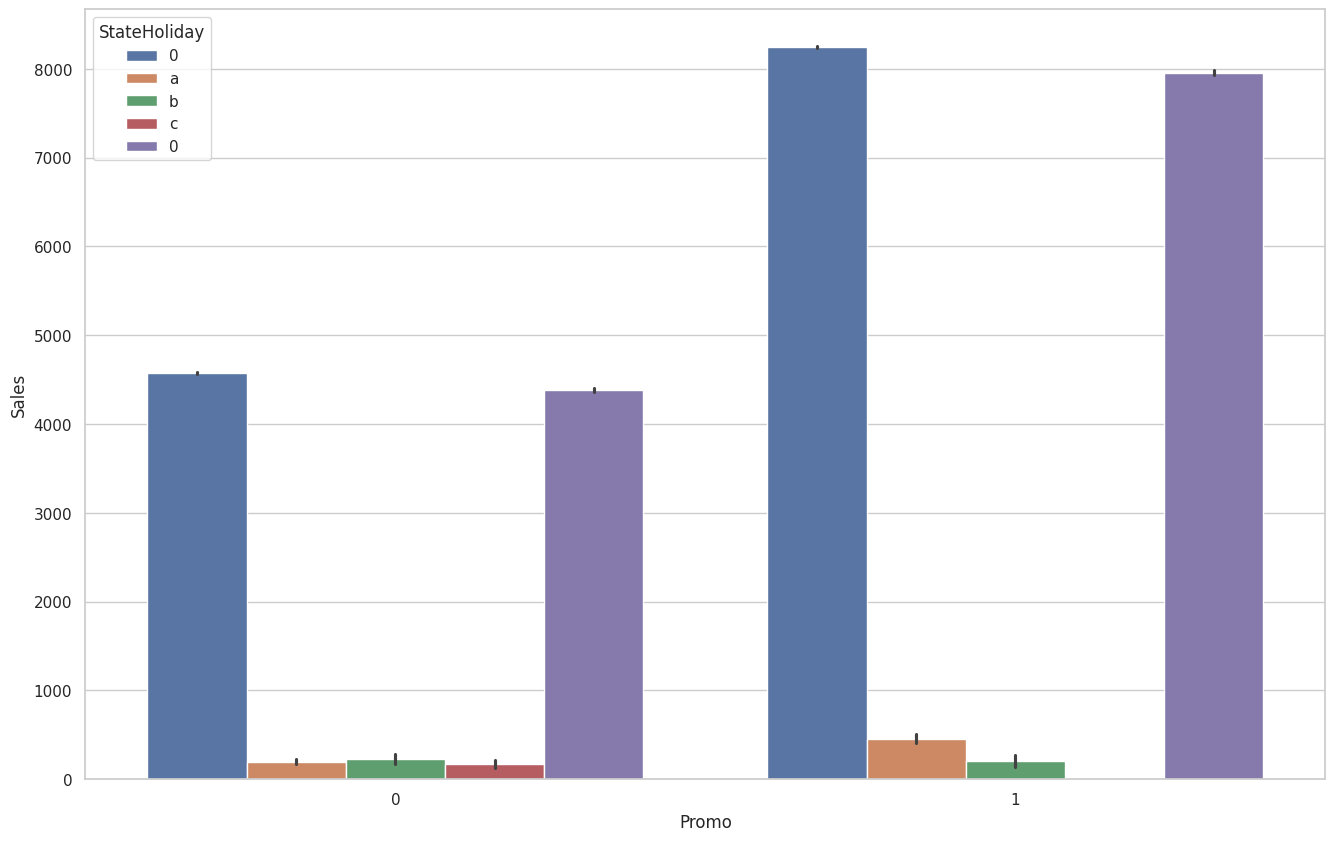

In [34]:
sns.barplot(x='Promo',y='Sales',hue='StateHoliday',data=Sales_train)

#Could the promos be deployed in more effective ways? Which stores should promos be deployed in?

In [35]:
effect_of_promo=Sales_train.groupby('Store')[['Sales','Customers']].mean()
effect_of_promo


,Sales,Customers
Store,,
1,3945.704883,467.646497
2,4122.991507,486.045648
3,5741.253715,620.286624
4,8021.769639,1100.057325
5,3867.110403,444.360934
...,...,...
1111,4342.968153,373.548832
1112,8465.280255,693.498938
1113,5516.180467,596.763270


# Trends of customer behavior during store open and closing times

In [36]:
trend_of_customer=Sales_train.groupby('Open')[['Customers']].mean()
trend_of_customer

,Customers
Open,
0,0.000000
1,762.728395


Which stores are opened on all weekdays? How does that affect their sales weekends?

In [37]:
weekdays=Sales_train.groupby('DayOfWeek')[['Sales']].mean()
weekdays

,Sales
DayOfWeek,
1,7809.044510
2,7005.244467
3,6555.884138
4,6247.575913
5,6723.274305
6,5847.562599
7,204.183189


<Axes: xlabel='StoreType', ylabel='Sales'>

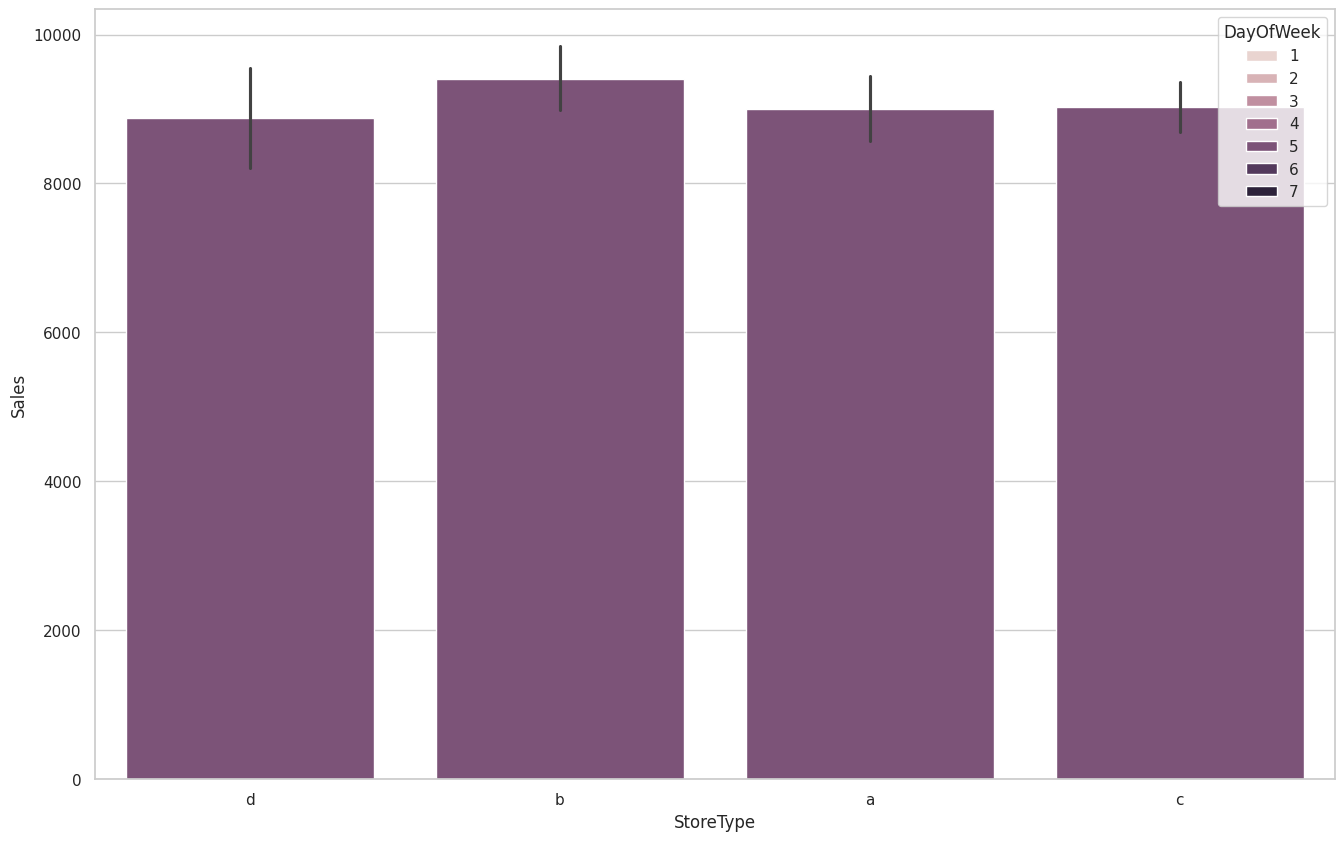

In [38]:
sns.barplot(x=Sales_data["StoreType"], y=Sales_train['Sales'], hue=Sales_train["DayOfWeek"])

#- Open suggests that whether the store was open or closed for refurbishment and weekends or holidays

     


<Axes: xlabel='Open', ylabel='Sales'>

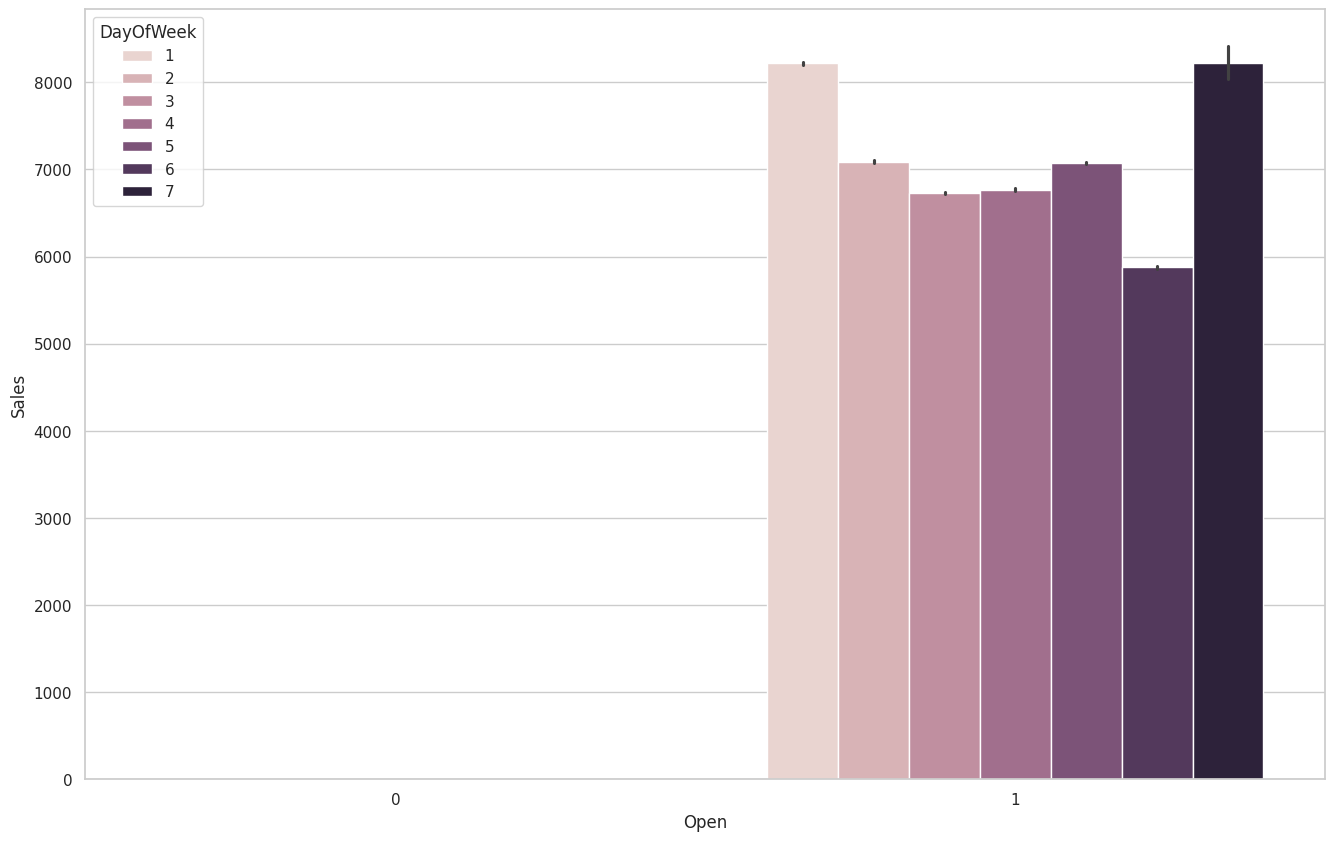

In [39]:
sns.barplot(x=Sales_train["Open"],y=Sales_train['Sales'],hue=Sales_train["DayOfWeek"])

<Axes: xlabel='Open', ylabel='count'>

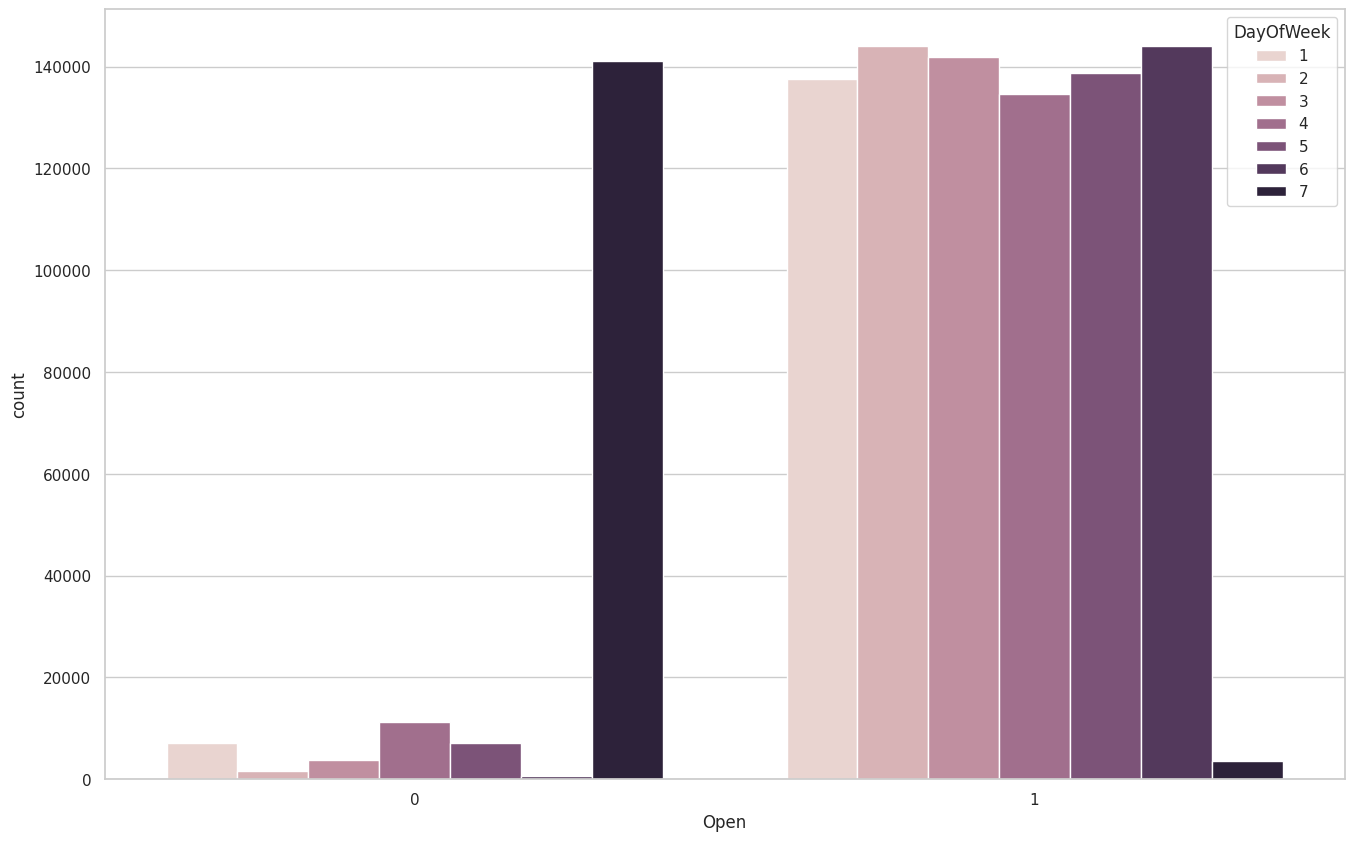

In [40]:
sns.countplot(x=Sales_train["Open"], hue=Sales_train["DayOfWeek"])

# Check how the assortment type affects sales

<Axes: xlabel='StoreType', ylabel='Sales'>

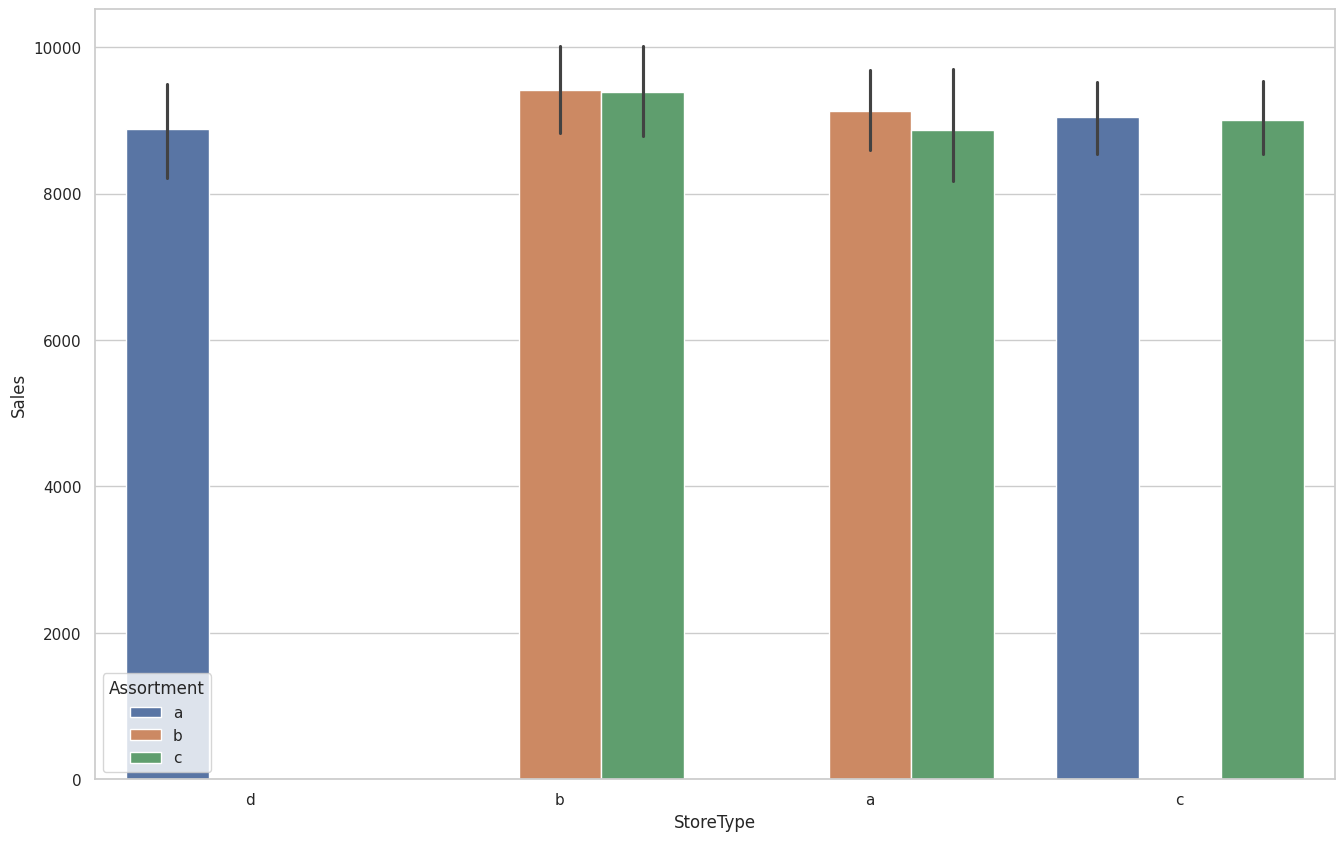

In [41]:
sns.barplot(x=Sales_data["StoreType"],y=Sales_train['Sales'],hue=Sales_data["Assortment"])

In [42]:
Sales_data.columns

Index(['Date', 'Store', 'DayOfWeek', 'Open', 'Promo', 'SchoolHoliday', 'Sales',
       'Customers', 'StateHoliday', 'Month', 'Week', 'Season', 'Assortment',
       'StoreType'],
      dtype='object')

In [43]:
Sales_train.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'Before_Holiday', 'After_Holiday',
       'During_Holiday'],
      dtype='object')

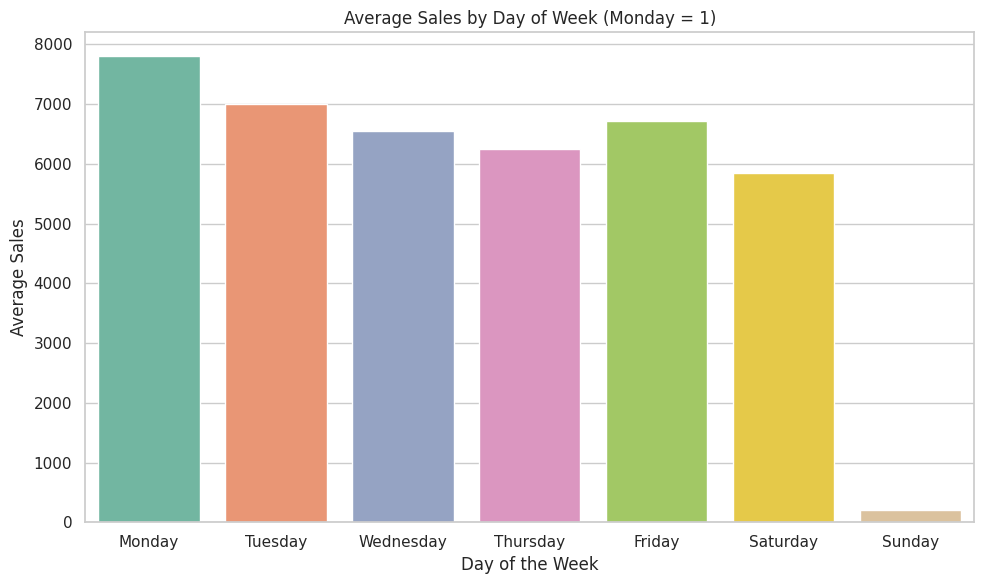

In [44]:
weekday_map = {
    1: ('Monday', 1),
    2: ('Tuesday', 2),
    3: ('Wednesday', 3),
    4: ('Thursday', 4),
    5: ('Friday', 5),
    6: ('Saturday', 6),
    7: ('Sunday', 7)
}

# Apply mapping to Sales_train
Sales_train['WeekdayName'] = Sales_train['DayOfWeek'].map(lambda x: weekday_map[x][0])
Sales_train['WeekdayOrder'] = Sales_train['DayOfWeek'].map(lambda x: weekday_map[x][1])

# Group by weekday
weekdays = (
    Sales_train.groupby(['WeekdayOrder', 'WeekdayName'])['Sales']
    .mean()
    .reset_index()
    .sort_values('WeekdayOrder')
)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='WeekdayName', y='Sales', data=weekdays, palette='Set2')
plt.title("Average Sales by Day of Week (Monday = 1)")
plt.xlabel("Day of the Week")
plt.ylabel("Average Sales")
plt.tight_layout()
plt.show()


In [45]:
# highlights weekends
weekends=Sales_train[Sales_train['DayOfWeek'].isin([6,7])].groupby('DayOfWeek')[['Sales']].mean()
weekends

,Sales
DayOfWeek,
6,5847.562599
7,204.183189


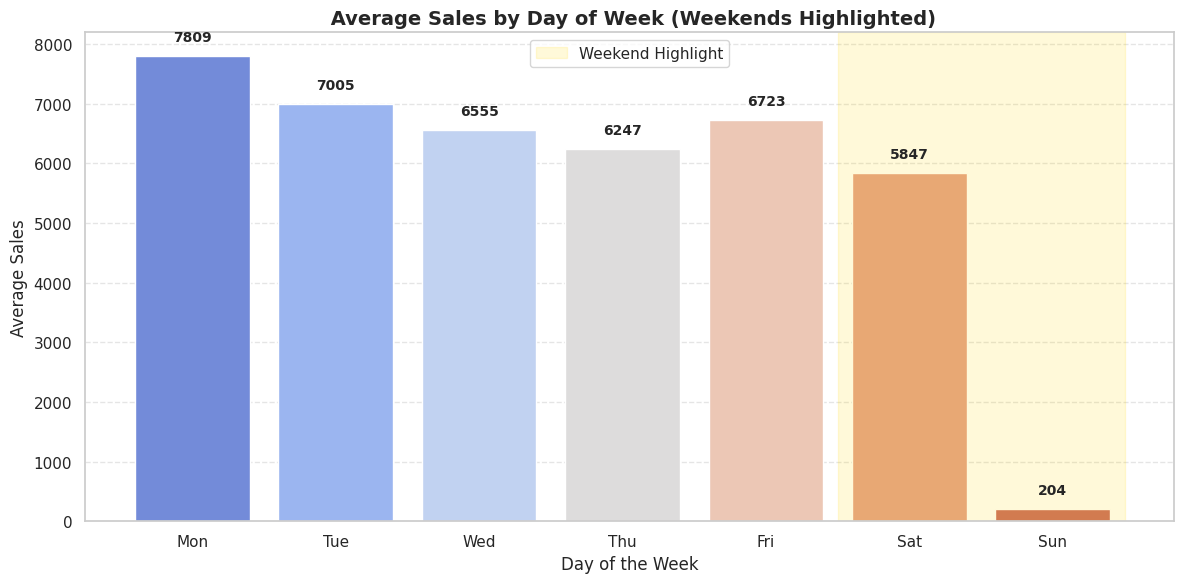

In [46]:
# Step 1: Mapping and grouping (assumes DayOfWeek is 1–7)
weekday_map = {
    1: 'Mon', 2: 'Tue', 3: 'Wed',
    4: 'Thu', 5: 'Fri', 6: 'Sat', 7: 'Sun'
}

Sales_train['WeekdayName'] = Sales_train['DayOfWeek'].map(weekday_map)

# Preserve the order
ordered_days = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
Sales_train['WeekdayName'] = pd.Categorical(Sales_train['WeekdayName'], categories=ordered_days, ordered=True)

# Step 2: Aggregate
avg_sales = Sales_train.groupby('WeekdayName')['Sales'].mean().reindex(ordered_days)

# Step 3: Plot
plt.figure(figsize=(12, 6))
bars = sns.barplot(x=avg_sales.index, y=avg_sales.values, palette='coolwarm')

# Step 4: Highlight Weekends (Sat = index 5, Sun = index 6)
plt.axvspan(4.5, 6.5, color='gold', alpha=0.15, label='Weekend Highlight')

# Step 5: Add value labels on top of bars
for i, v in enumerate(avg_sales.values):
    plt.text(i, v + 200, f'{int(v)}', ha='center', va='bottom', fontweight='bold', fontsize=10)

# Step 6: Custom styling
plt.title(" Average Sales by Day of Week (Weekends Highlighted)", fontsize=14, fontweight='bold')
plt.xlabel("Day of the Week", fontsize=12)
plt.ylabel("Average Sales", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()


# Which stores are opened on all weekdays?

In [47]:
store_open_All_weekdays = Sales_train[Sales_train["Open"] == 1].groupby("Store")["DayOfWeek"].nunique()
print(store_open_All_weekdays)

Store
1       6
2       6
3       6
4       6
5       6
       ..
1111    6
1112    6
1113    6
1114    6
1115    6
Name: DayOfWeek, Length: 1115, dtype: int64


In [48]:
store_open_All_weekdays.value_counts()

,count
DayOfWeek,
6,1082
7,33


In [49]:
# Extract average sales for Friday (Day 5)
friday_sales = Sales_train.query("DayOfWeek == 5")["Sales"].mean()

# Extract average sales for Sunday (Day 7)
sunday_sales = Sales_train.query("DayOfWeek == 7")["Sales"].mean()

# Compute the difference in average sales (Sunday minus Friday)
sales_diff = sunday_sales - friday_sales

# Display result
print(f" Sunday vs. Friday Sales Difference: {sales_diff:.2f}")


 Sunday vs. Friday Sales Difference: -6519.09
